# FFT
Lê um arquivo PDM gravado pelo ESP32 (com ou sem cabeçalho) e plota o gráfico da FFT em escala semilogarítimica.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

def fftplot_32bit(filename, fs):
    """Lê um arquivo PDM de audio WAV ou RAW 32 bits e plota o gráfico da FFT


    Args:
        filename (_type_): Path to the file to be read
        fs (_type_): Bit sampling rate of the audio
    """
    #leitura do arquivo
    data = np.fromfile(filename, dtype=np.uint32)
    data = data[len(data)//2:]
    data = data.byteswap()
    data2 = data.view(np.uint8)
    bits = np.unpackbits(data2) #bytes para bits
    pdm_signal = 2 * bits.astype(np.float64) - 1 #transformar pra bipolar
    
    # calcular fft
    N = len(pdm_signal)
    spec = np.fft.rfft(pdm_signal)
    freq = np.fft.rfftfreq(N, 1/fs)

    # plot
    fig, ax = plt.subplots()
    ax.semilogx(freq, 20*np.log10(spec), linewidth=0.5)
    ax.set_xlabel('Frequência (Hz)')
    ax.set_ylabel('Magnitude (dB)')
    ax.set_title('Espectro de Frequência (FFT)')
    plt.grid(True, which="both", linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
def fftplot_16bit(filename, fs):
    """Lê um arquivo PDM de audio WAV ou RAW 16 bits e plota o gráfico da FFT


    Args:
        filename (_type_): Path to the file to be read
        fs (_type_): Bit sampling rate of the audio
    """
    #leitura do arquivo
    data = np.fromfile(filename, dtype=np.uint16)
    data = data[len(data)//2:]
    data = data.byteswap()
    data2 = data.view(np.uint8)
    bits = np.unpackbits(data2) #bytes para bits
    pdm_signal = 2 * bits.astype(np.float64) - 1 #transformar pra bipolar
    
    # calcular fft
    N = len(pdm_signal)
    spec = np.fft.rfft(pdm_signal)
    freq = np.fft.rfftfreq(N, 1/fs)

    # plot
    fig, ax = plt.subplots()
    ax.semilogx(freq, 20*np.log10(spec), linewidth=0.5)
    ax.set_xlabel('Frequência (Hz)')
    ax.set_ylabel('Magnitude (dB)')
    ax.set_title('Espectro de Frequência (FFT)')
    plt.grid(True, which="both", linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

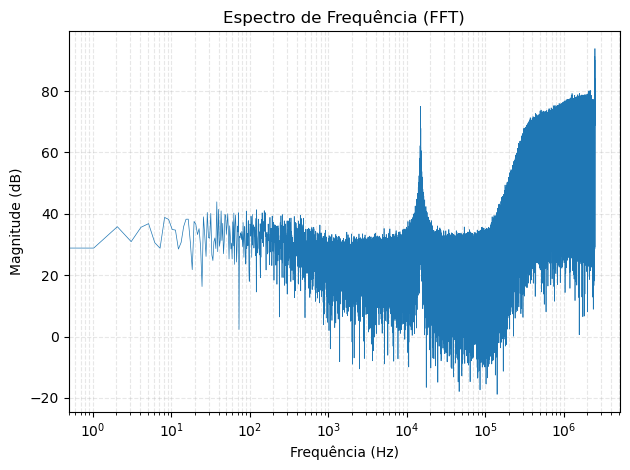

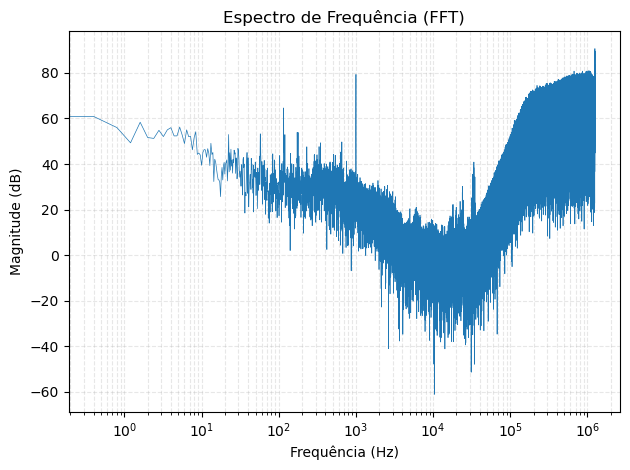

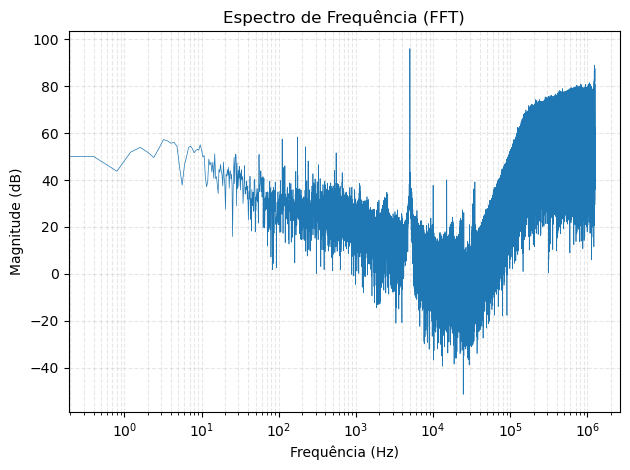

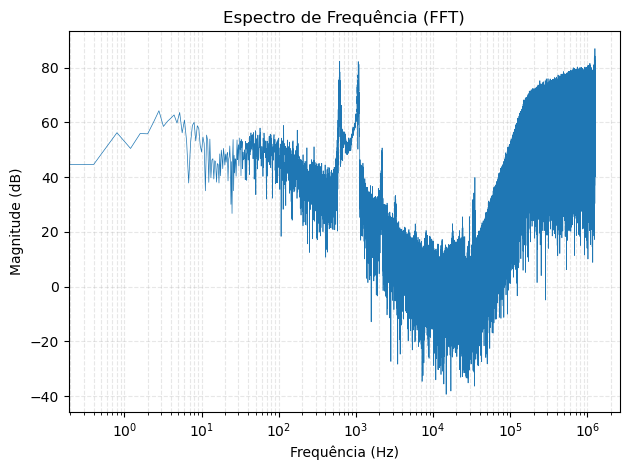

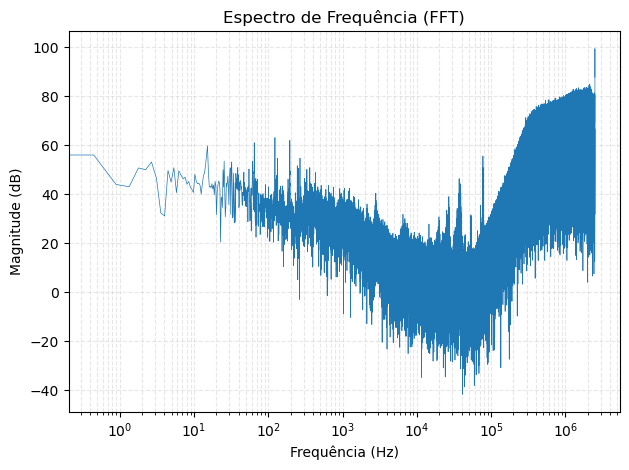

In [42]:
fftplot_32bit("REC_test_pure_pdm_16bit_15k_5M_SBPA2.WAV", 5e6)
fftplot_16bit("audio1-sine-1khz.RAW", 2.5e6)
fftplot_16bit("CINCOKHZ.RAW", 2.5e6)
fftplot_16bit("audio3.RAW", 2.5e6)
fftplot_32bit("audio4-32bits.RAW", 5e6)